<div align="left"> <h3>Jonatan Plantey<br/>
M1 - IA School<br/>
Projet IA
</h3> </div>
<div align="center"> <h1>Ethic Fashion : <br/> De la fast fashion à la mode éthique</h1> </div>
<div align="center"> <h3>Notebook en complément du document : Fast & Ethic Faschion.docx</h3> </div>
<br/><br/><br/><br/>

<div align="left"> <h1> A) 1ère PARTIE - Analyse des données de Wish.com</h1> </div>
<div align="left"> <h3> Sales of summer clothes in E-commerce Wish (août 2020)</h3> </div>
</br>

|**Source**|https://www.kaggle.com/datasets/jmmvutu/summer-products-and-sales-in-ecommerce-wish|
|:-|:-:|
|**Producteur**|Jeffrey Mvutu Mabilama|
|**Datasets**|<i>summer-products-with-rating-and-performance_2020-08.csv</i>

## Résumé du fichier
Sélectionné sur le site Kaggle, le fichier de données de cette étude donne un aperçu de quelques-uns des vêtements de la collection été 2020, vendus dès juillet, sur la plateforme d'e-commerce Wish.com hébergée à San Francisco.
  
Il contient 43 caractéristiques (en colonne) portant sur quelques 1573 articles (en ligne).
  
On priorise ici notre intérêt pour les sujets relatifs au prix, au nombre d'unités, à la taille, à la note moyenne attribuée par les clients ainsi qu'à la provenance des articles vendus. 

### Imports

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import geopandas as gpd
import seaborn as sns

pd.set_option('display.max_columns', 50, 'display.max_colwidth', 100,
              'display.min_rows', 20, 'display.max_rows', 30, 'display.width', 1000)

## I) Chargement des fichiers et exploration des données

In [200]:
PROJECT_PATH = r'C:\Users\zara\Desktop\A-IA_School\Projets\Projet IA\Projet IA - Livré'

PATH_FILE_summer_products = os.path.join(PROJECT_PATH, 'summer-products-with-rating-and-performance_2020-08.csv')
data_summer_products = pd.read_csv(PATH_FILE_summer_products, sep = ",", decimal = ".", encoding = "utf-8")
data_summer_products = pd.read_csv(PATH_FILE_summer_products)

In [201]:
data_summer_products.dtypes

title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
                                 ...   
merchant_rating_count             int64
merchant_rating                 float64
merchant_id                      object
merchant_has_profile_picture      int64
merchant_profile_picture         object
product_url                      object
product_picture                  object
product_id                       object
theme                            object
crawl_month                      object
Length: 43, dtype: object

In [202]:
data_summer_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [203]:
data_summer_products.head(0)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month


In [204]:
data_summer_products_100 = data_summer_products.head(100)
np.savetxt(PROJECT_PATH + r'\data_summer_products.csv', data_summer_products, delimiter = ";", fmt='%s', encoding = "utf-8")

## II) Observation de la distribution des prix
### a) Distribution des prix avant remise

In [205]:
prix_avant_remise = data_summer_products['retail_price']

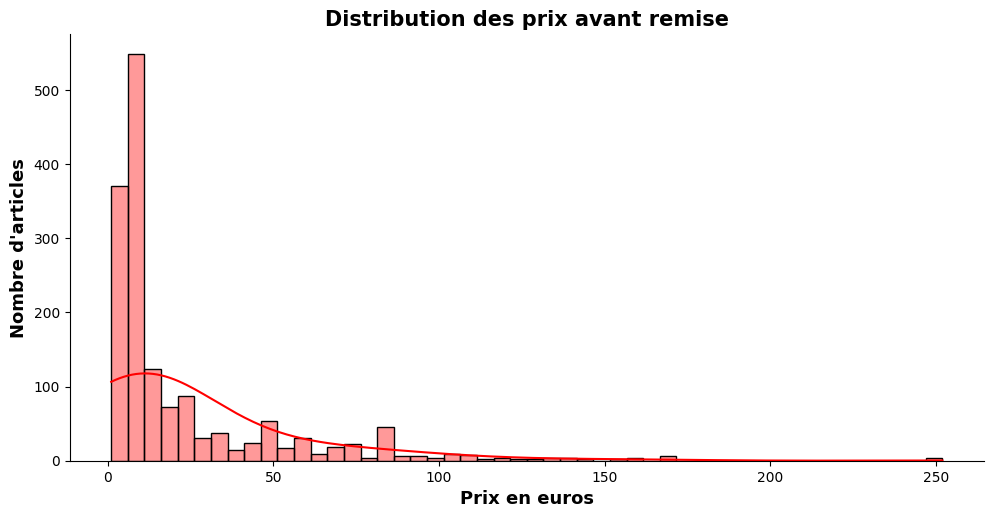

In [206]:
# Création du graphique avec modification de la fenêtre du KDE
sns.displot(prix_avant_remise, bins=50, kde=True, aspect=2, kde_kws={'bw_adjust': 3}, color='red', alpha=0.4)

# Modification des labels des axes et ajout d'un titre
plt.xlabel("Prix en euros", fontsize=13, fontweight='bold')
plt.ylabel("Nombre d'articles", fontsize=13, fontweight='bold')
plt.title("Distribution des prix avant remise", fontsize=15, fontweight='bold')

# Sauvegarder le graphique en haute définition
plt.savefig('Graphiques/Distribution des prix avant remise.png', dpi=300, bbox_inches='tight')

### b) Distribution des prix après remise

In [207]:
prix = data_summer_products['price']

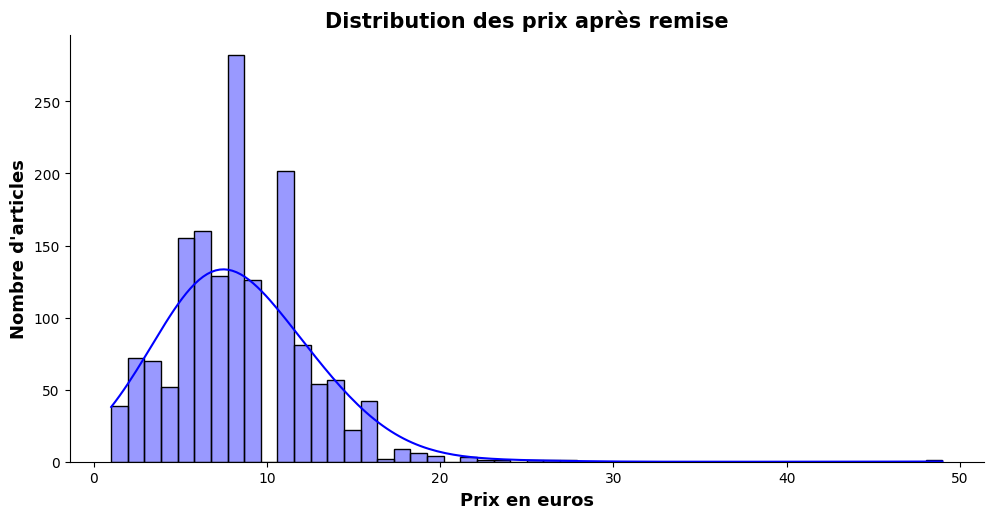

In [208]:
# Création du graphique avec modification de la fenêtre du KDE
sns.displot(prix, bins=50, kde=True, aspect=2, kde_kws={'bw_adjust': 3}, color='blue', alpha=0.4) # Vous pouvez ajuster la valeur de 'bw_adjust' pour modifier la fenêtre du KDE

# Modification des labels des axes et ajout d'un titre
plt.xlabel("Prix en euros", fontsize=13, fontweight='bold')
plt.ylabel("Nombre d'articles", fontsize=13, fontweight='bold')
plt.title("Distribution des prix après remise", fontsize=15, fontweight='bold')

# Sauvegarder le graphique en haute définition
plt.savefig('Graphiques/Distribution des prix après remise.png', dpi=300, bbox_inches='tight')

### c) Comparaison des distributions des prix inférieurs à 20 euros, avant et après remise

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


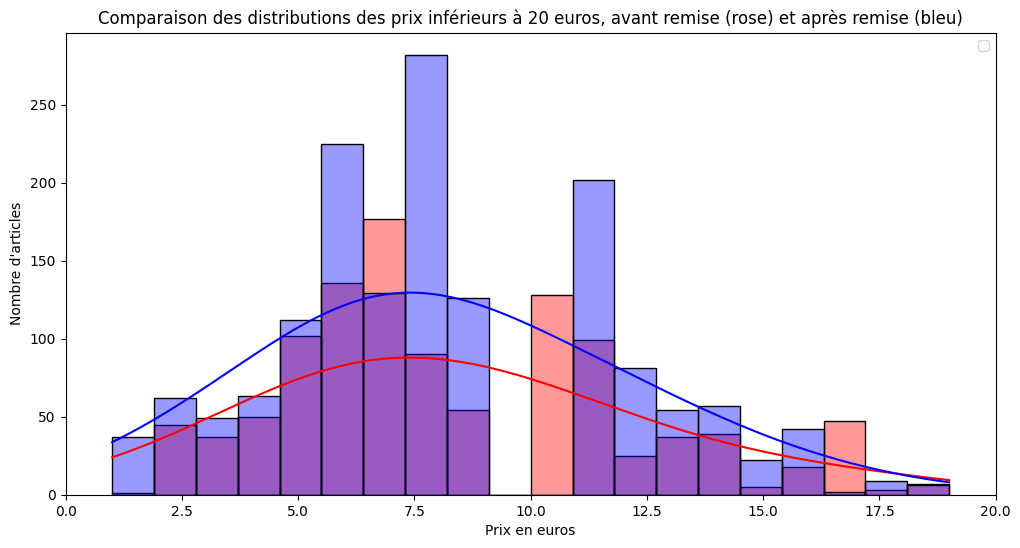

In [209]:
# Vues superposées (non retenues dans le document de présentation du projet)

# Filtrage des valeurs inférieures à 20
prix_avant_remise_inferieurs_20 = prix_avant_remise[prix_avant_remise < 20]
prix_après_remise_inferieurs_20 = prix[prix < 20]

# Paramètres de l'affichage
plt.figure(figsize = [12, 6])
plt.xlim(0,20)

# Création du graphique avec les deux KDE superposés
# Ajout d'un histogramme pour chaque distribution
sns.histplot(prix_avant_remise_inferieurs_20, bins=20, color='red', alpha=0.4, kde = True, kde_kws={'bw_adjust': 3})
sns.histplot(prix_après_remise_inferieurs_20, bins=20, color='blue', alpha=0.4, kde = True, kde_kws={'bw_adjust': 3})

# Modification des labels des axes et ajout d'un titre
plt.xlabel("Prix en euros")
plt.ylabel("Nombre d'articles")
plt.title("Comparaison des distributions des prix inférieurs à 20 euros, avant remise (rose) et après remise (bleu)")

# Ajout de la légende
plt.legend()

plt.show()

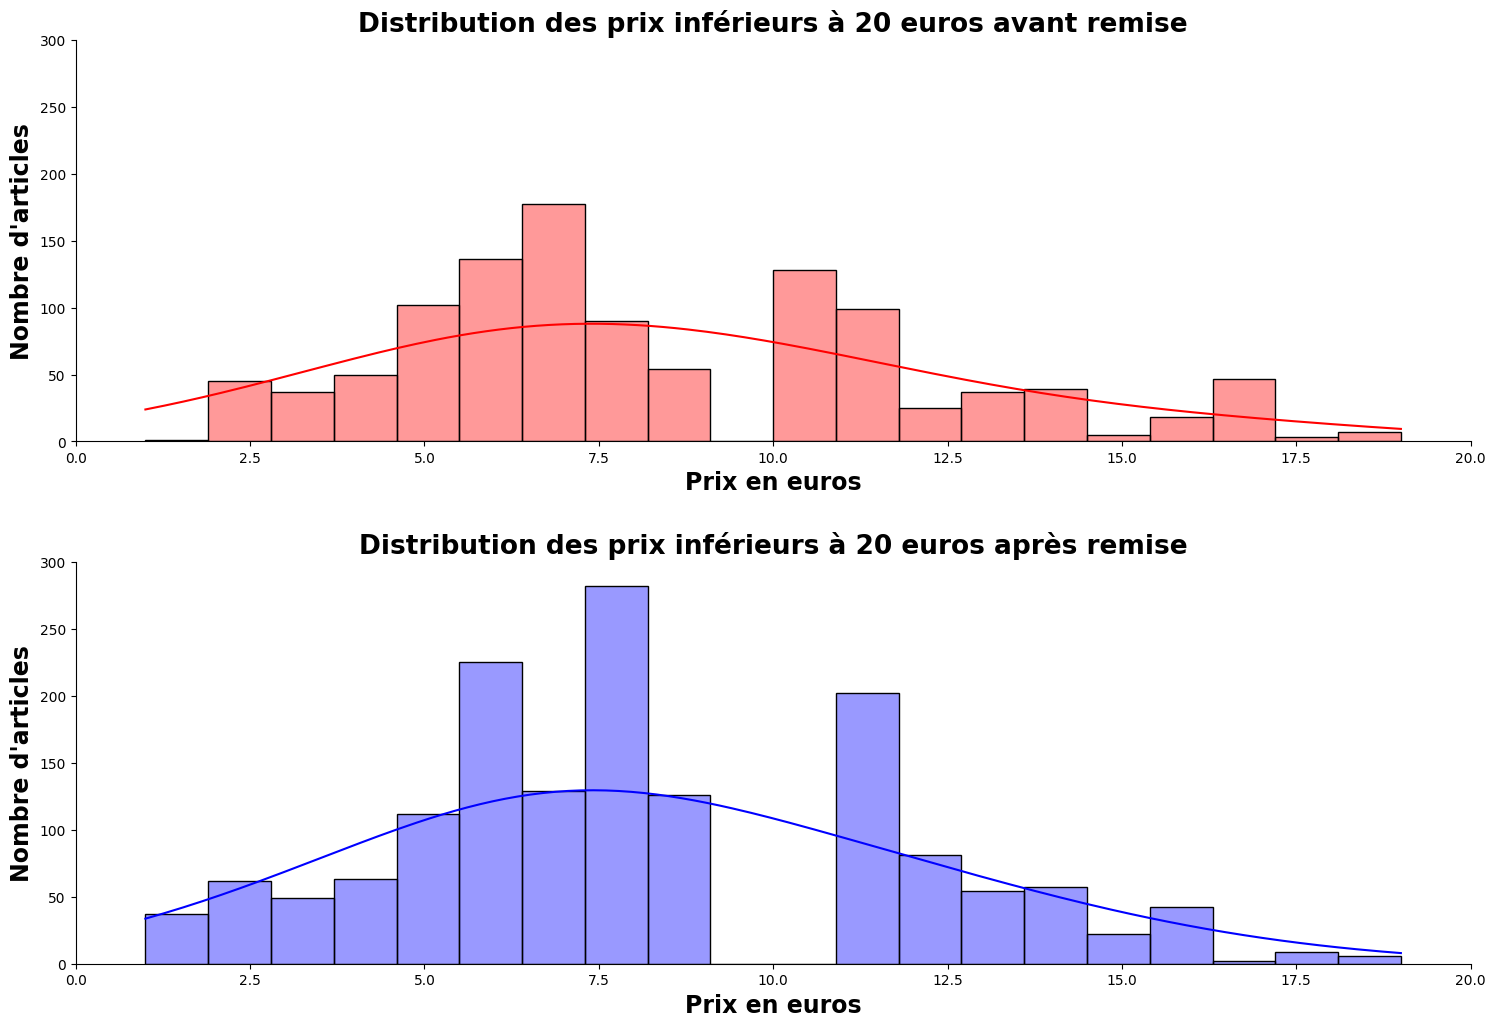

In [210]:
# Vues juxtaposées

# Filtrage des valeurs inférieures à 20
prix_avant_remise_inferieurs_20 = prix_avant_remise[prix_avant_remise < 20]
prix_après_remise_inferieurs_20 = prix[prix < 20]

# Création d'une figure avec deux sous-graphiques (l'un en dessous de l'autre)
fig, axes = plt.subplots(2, 1, figsize=(18, 12))

# Premier graphique (prix_avant_remise_inferieurs_20)
sns.histplot(prix_avant_remise_inferieurs_20, bins=20, color='red', alpha=0.4, kde=True, kde_kws={'bw_adjust': 3}, ax=axes[0])
axes[0].set_xlim(0, 20)
axes[0].set_ylim(0, 300)
axes[0].set_xlabel("Prix en euros", fontsize=17, fontweight='bold')
axes[0].set_ylabel("Nombre d'articles", fontsize=17, fontweight='bold')
axes[0].set_title("Distribution des prix inférieurs à 20 euros avant remise", fontsize=19, fontweight='bold')
# Rendre invisible une partie du cadre du graphique
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Second graphique (prix_après_remise_inferieurs_20)
sns.histplot(prix_après_remise_inferieurs_20, bins=20, color='blue', alpha=0.4, kde=True, kde_kws={'bw_adjust': 3}, ax=axes[1])
axes[1].set_xlim(0, 20)
axes[1].set_ylim(0, 300)
axes[1].set_xlabel("Prix en euros", fontsize=17, fontweight='bold')
axes[1].set_ylabel("Nombre d'articles", fontsize=17, fontweight='bold')
axes[1].set_title("Distribution des prix inférieurs à 20 euros après remise", fontsize=19, fontweight='bold')
# Rendre invisible une partie du cadre du graphique
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Ajustement de l'espacement entre les sous-graphiques
plt.subplots_adjust(hspace=0.3)

# Sauvegarder le graphique en haute définition
plt.savefig('Graphiques/Comparaison des prix inférieurs à 20 euros.png', dpi=300, bbox_inches='tight')

# Affichage du graphique
plt.show()

### d) Calculs des moyennes des prix inférieurs à 20 euros avant et après remise

In [211]:
moyenne_prix_avant_remise_inferieurs_20 = np.mean(prix_avant_remise_inferieurs_20)
print(moyenne_prix_avant_remise_inferieurs_20)

8.38


In [212]:
moyenne_prix_après_remise_inferieurs_20 = np.mean(prix_après_remise_inferieurs_20)
print(moyenne_prix_après_remise_inferieurs_20)

8.189621794871796


In [213]:
#Arrêt_1 du notebook (de sécurité) # (À masquer ou non selon les besoins)

### e) Diagramme en barres des meilleures ventes

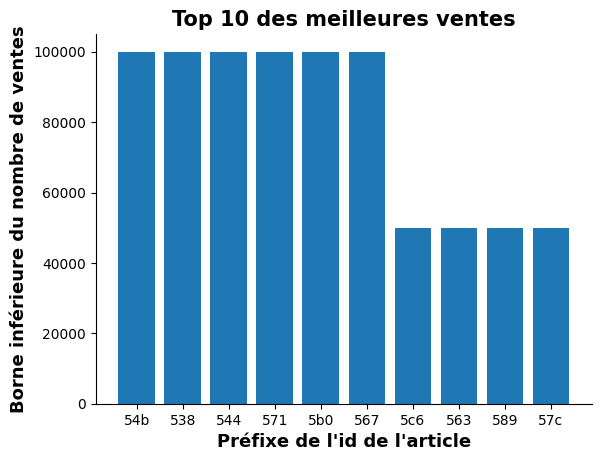

In [214]:
# Sélectionner les colonnes "product_id" et "units_sold"
ventes = data_summer_products[["product_id", "units_sold", "product_url", "product_picture"]]

# Trier les données par nombre de ventes en ordre décroissant
ventes_triées = ventes.sort_values("units_sold", ascending=False)

# Sélectionner les 10 premières lignes de données
top_10_des_meilleures_ventes = ventes_triées.head(10)

# Récupérer les id de produit et les nombres de ventes
id_du_top_10 = [product_id[:3] for product_id in top_10_des_meilleures_ventes["product_id"]]
ventes_du_top_10 = top_10_des_meilleures_ventes["units_sold"]

# Ajout d'une barre pour éviter la disparition de la 10ème barre lors de l'affichage du diagramme
id_du_top_11 = [product_id[:3] for product_id in ventes_triées.head(11)["product_id"]]
ventes_du_top_11 = ventes_triées.head(11)["units_sold"]

# Créer le diagramme à barres en utilisant matplotlib
plt.bar(id_du_top_11, ventes_du_top_11)
plt.xlabel("Préfixe de l'id de l'article", fontsize=13, fontweight='bold')
plt.ylabel("Borne inférieure du nombre de ventes", fontsize=13, fontweight='bold')
plt.title("Top 10 des meilleures ventes", fontsize=15, fontweight='bold')

# Rendre invisible une partie du cadre du graphique
axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Sauvegarder le graphique en haute définition
plt.savefig('Graphiques/Top 10 des meilleures ventes.png', dpi=300, bbox_inches='tight')

# Afficher le diagramme
plt.show()

In [215]:
ventes_du_top_10

214     100000
251     100000
92      100000
1168    100000
17      100000
1018    100000
6        50000
401      50000
952      50000
333      50000
Name: units_sold, dtype: int64

In [216]:
top_10_des_meilleures_ventes.product_url

214     https://www.wish.com/c/54bdf18039b8c045f118936a
251     https://www.wish.com/c/53897eeeafddf70c91af1cda
92      https://www.wish.com/c/544b079d1280fa28eee9b380
1168    https://www.wish.com/c/571adeab62cce546f1a46bc0
17      https://www.wish.com/c/5b07a7c6e997b33c6f9947da
1018    https://www.wish.com/c/567cb0925ff12c4829f07dfb
6       https://www.wish.com/c/5c63a337d5e2ce4bbb3152cf
401     https://www.wish.com/c/563707b0e5be09157176fe80
952     https://www.wish.com/c/5892e3b0da200f71bcec426e
333     https://www.wish.com/c/5b07f4f16e42c03e6eb4b1f6
Name: product_url, dtype: object

In [217]:
top_10_des_meilleures_ventes.product_picture

214     https://contestimg.wish.com/api/webimage/54bdf18039b8c045f118936a-medium.jpg
251     https://contestimg.wish.com/api/webimage/53897eeeafddf70c91af1cda-medium.jpg
92      https://contestimg.wish.com/api/webimage/544b079d1280fa28eee9b380-medium.jpg
1168    https://contestimg.wish.com/api/webimage/571adeab62cce546f1a46bc0-medium.jpg
17      https://contestimg.wish.com/api/webimage/5b07a7c6e997b33c6f9947da-medium.jpg
1018    https://contestimg.wish.com/api/webimage/567cb0925ff12c4829f07dfb-medium.jpg
6       https://contestimg.wish.com/api/webimage/5c63a337d5e2ce4bbb3152cf-medium.jpg
401     https://contestimg.wish.com/api/webimage/563707b0e5be09157176fe80-medium.jpg
952     https://contestimg.wish.com/api/webimage/5892e3b0da200f71bcec426e-medium.jpg
333     https://contestimg.wish.com/api/webimage/5b07f4f16e42c03e6eb4b1f6-medium.jpg
Name: product_picture, dtype: object

### f) Diagramme circulaire des proportions des ventes par taille de vêtement

In [218]:
# Afficher la multiplicité des tailles pour les rassembler si besoin
différentes_tailles = data_summer_products['product_variation_size_id'].value_counts()
print(différentes_tailles[différentes_tailles > 1])

product_variation_size_id
S           641
XS          356
M           200
XXS         100
L            49
S.           18
XL           17
XXL          15
XXXS          6
s             5
           ... 
5XL           2
SIZE-XXS      2
Suit-S        2
One Size      2
Size S.       2
3XL           2
EU 35         2
29            2
XXXXXL        2
1             2
Name: count, Length: 43, dtype: int64


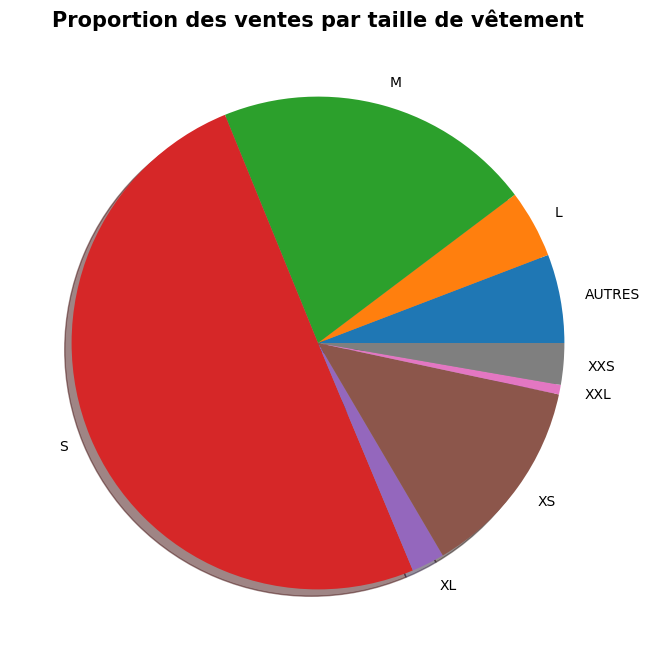

In [219]:
# Nettoyer les données
data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace("choose a size", np.nan)

data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace("XS.", "XS")
data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace("Size-XS", "XS")
data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace('SIZE XS', 'S')

data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace("S.", "S")
data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace("s", "S")
data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace("Suit-S", "S")
data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace('Size S', 'S')
data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace('Size-S', 'S')
data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace('Size S', 'S')
data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace('SIZE S', 'S')
data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace('size S', 'S')

data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace("M.", "M")
data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace('Size M', 'M')

data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace("L.", "L")
data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace("32/L", "L")
data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace('SizeL', 'L')

data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace('1 PC - XL', 'XL')

data_summer_products["product_variation_size_id"] = data_summer_products["product_variation_size_id"].replace('2XL', 'XXL')

# Fonction pour regrouper les données aberrantes
def regroupement_autres_tailles(name):
    if name == 'XXS' \
    or name == 'XS' \
    or name == 'S' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == 'XXL':
        return name
    else:
        return "AUTRES"

data_summer_products['product_variation_size_id'] = data_summer_products['product_variation_size_id'].replace(np.nan, 'OTHER')

data_summer_products['product_variation_size_id'] = data_summer_products['product_variation_size_id'].apply(regroupement_autres_tailles)


# Grouper les données par catégorie et calculer les ventes totales par taille
ventes_par_taille = data_summer_products.groupby("product_variation_size_id")["units_sold"].sum()


# Récupérer les catégories et les ventes totales
tailles = ventes_par_taille.index
ventes_pour_chaque_taille = ventes_par_taille.values

# Créer le diagramme en secteurs en utilisant matplotlib
plt.figure(figsize = [8, 8])
plt.pie(ventes_pour_chaque_taille, labels = tailles, shadow = True,)
plt.title("Proportion des ventes par taille de vêtement", fontsize=15, fontweight='bold')

# Sauvegarder le graphique en haute définition
plt.savefig('Graphiques/Proportion des ventes par taille de vêtement.png', dpi=300, bbox_inches='tight')

# Afficher le diagramme
plt.show()

In [220]:
ventes_par_taille.sort_values()

product_variation_size_id
XXL         42760
XL         147700
XXS        185838
L          304353
AUTRES     397132
XS         900599
M         1425437
S         3421436
Name: units_sold, dtype: int64

### g) Relation entre le nombre de ventes d'un article et la et la note qui lui est attribuée

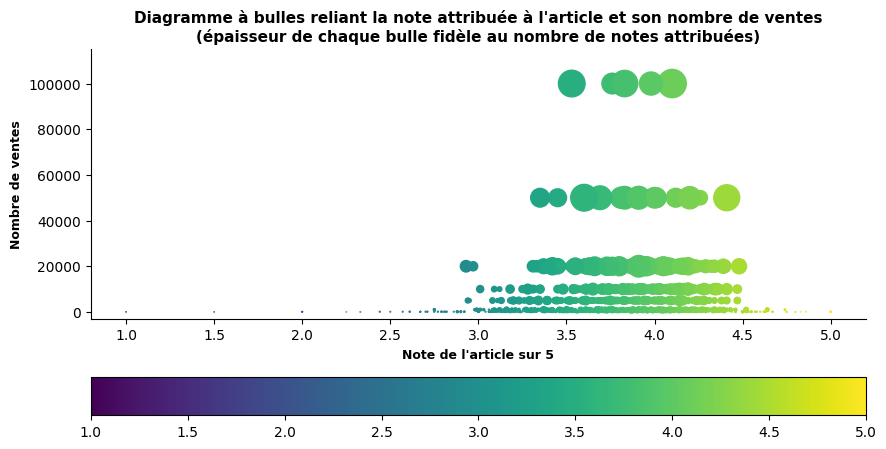

In [221]:
# Créez le diagramme en nuage de points
plt.figure(figsize = [10, 5])
plt.ylim(-3000,115000)

s = data_summer_products['rating_count'] / 50

plt.scatter(data_summer_products['rating'], data_summer_products['units_sold'], s = s, c=data_summer_products['rating'], cmap='viridis')

plt.xlabel("Note de l'article sur 5", fontsize=9, fontweight='bold')
plt.ylabel("Nombre de ventes", fontsize=9, fontweight='bold')
plt.title("Diagramme à bulles reliant la note attribuée à l'article et son nombre de ventes\n(épaisseur de chaque bulle fidèle au nombre de notes attribuées)", fontsize=11, fontweight='bold')

# Ajoutez une légende avec l'espacement ajusté
plt.colorbar(location='bottom', pad=0.15) # Modifiez la valeur de 'pad' pour ajuster l'espacement

# Rendre invisible une partie du cadre du graphique
axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Sauvegarder le graphique en haute définition
plt.savefig('Graphiques/Diagramme à bulles.png', dpi=300, bbox_inches='tight')

# Affichez le graphique
plt.show()

### h) Nombre d'articles vendus par pays

In [222]:
codes_pays_producteurs = data_summer_products['origin_country'].value_counts()
codes_pays_producteurs

origin_country
CN    1516
US      31
VE       5
SG       2
AT       1
GB       1
Name: count, dtype: int64

In [223]:
ventes_par_codes_pays_producteur = data_summer_products.groupby("origin_country")["units_sold"].sum()
ventes_par_codes_pays_producteur = pd.DataFrame(ventes_par_codes_pays_producteur)
ventes_par_codes_pays_producteur

,units_sold
origin_country,
AT,100
CN,6651245
GB,1000
SG,20100
US,43560
VE,350


In [224]:
# Chargez le jeu de données à partir d'un fichier Shapefile contenant la géographie et les codes de chaque pays
gdf = gpd.read_file('world-administrative-boundaries.shp')

# Affichez les colonnes du jeu de données
print(gdf.columns)

Index(['iso3', 'status', 'color_code', 'name', 'continent', 'region', 'iso_3166_1_', 'french_shor', 'geometry'], dtype='object')


In [225]:
pays_indexé_par_code = gdf[['iso_3166_1_','name']].set_index('iso_3166_1_')
pays_indexé_par_code

,name
iso_3166_1_,
NaN,South Georgia & the South Sandwich Islands
MN,Mongolia
ES,Spain
CY,Cyprus
MO,Macao
NaN,Jammu-Kashmir
HM,Heard Island and McDonald Islands
GF,French Guiana
CD,Democratic Republic of the Congo


In [226]:
pays_producteur_indexé_par_code = []
for code in ventes_par_codes_pays_producteur.index:
    pays_producteur_indexé_par_code.append(pays_indexé_par_code.loc[code])
pays_producteur_indexé_par_code = pd.DataFrame(pays_producteur_indexé_par_code)
pays_producteur_indexé_par_code

,name
AT,Austria
CN,China
GB,U.K. of Great Britain and Northern Ireland
SG,Singapore
US,United States of America
VE,Venezuela


In [227]:
# Fonction pour ajouter des annotations sur les barres d'un histograme horizontal (valeurs à droite des barres)
def annotate_barh(bars, color):
    for bar in bars:
        width = bar.get_width()
        plt.annotate('{}'.format(round(width, 2)),
                     xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0),  # Décalage vertical en points
                     textcoords="offset points",
                     ha='left', va='center',
                     color=color)

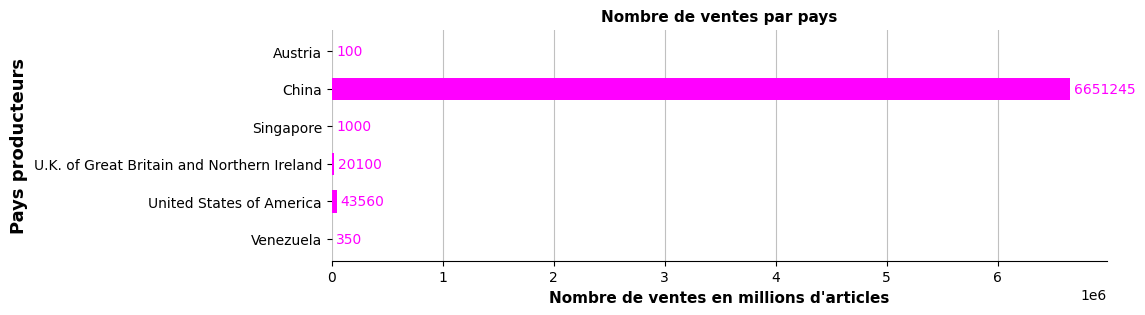

In [228]:
# Taille du graphique souhaité
plt.figure(figsize = [10, 3])

# Ajout d'un titre et des étiquettes 
plt.title("Nombre de ventes par pays", fontsize=11, fontweight='bold')
plt.xlabel("Nombre de ventes en millions d'articles", fontsize=11, fontweight='bold')
plt.ylabel("Pays producteurs", fontsize=13, fontweight='bold')

# Ajout d'une grille verticale
plt.grid(axis="x", color="silver", zorder=10)

# Réordonner les valeurs pour l'afichage du graphique
ventes_par_codes_pays_producteur = ventes_par_codes_pays_producteur.sort_values("origin_country", ascending = False)

# Construction du graphique
bars = plt.barh(pays_producteur_indexé_par_code.name.sort_values(ascending = False),
            ventes_par_codes_pays_producteur.units_sold,
            color="magenta",
            height = 0.6,
            zorder = 20)

# Ajout des valeurs sur les barres
annotate_barh(bars, "magenta")

# Rendre invisible une partie du cadre du graphique
axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)

# Sauvegarder le graphique en haute définition
plt.savefig('Graphiques/Nombre de ventes par pays.png', dpi=300, bbox_inches='tight')

In [229]:
gdf

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,NaN,UK Territory,GBR,South Georgia & the South Sandwich Islands,Antarctica,NaN,NaN,South Georgia & the South Sandwich Islands,"MULTIPOLYGON (((-26.24361 -58.49473, -26.24889 -58.49861, -26.26417 -58.48806, -26.29097 -58.478..."
1,MNG,Member State,MNG,Mongolia,Asia,Eastern Asia,MN,Mongolie,"POLYGON ((116.71138 49.83047, 116.64665 49.73805, 116.57027 49.62666, 116.50055 49.52471, 116.43..."
2,ESP,Member State,ESP,Spain,Europe,Southern Europe,ES,Espagne,"MULTIPOLYGON (((-17.91125 27.77375, -17.96389 27.68236, -17.98278 27.63750, -18.01445 27.64944, ..."
3,CYP,Member State,CYP,Cyprus,Asia,Western Asia,CY,Chypre,"POLYGON ((34.12000 35.40083, 33.95805 35.31277, 33.94833 35.30722, 33.94055 35.29944, 33.92139 3..."
4,MAC,CN Special Administrative Region,CHN,Macao,Asia,Eastern Asia,MO,Macao,"MULTIPOLYGON (((113.55143 22.16339, 113.55424 22.16123, 113.56047 22.16186, 113.57750 22.15450, ..."
5,NaN,Sovereignty unsettled,XXZ,Jammu-Kashmir,Asia,Eastern Asia,NaN,Jammu-Kashmir,"POLYGON ((77.88883 35.44156, 77.91205 35.43726, 77.94955 35.45644, 77.98908 35.49289, 78.04144 3..."
6,HMD,AU Territory,AUS,Heard Island and McDonald Islands,Antarctica,NaN,HM,Heard Island and McDonald Islands,"POLYGON ((73.43416 -53.02972, 73.44444 -53.03028, 73.46583 -53.02556, 73.48318 -53.01556, 73.527..."
7,GUF,FR Territory,FRA,French Guiana,Americas,South America,GF,French Guiana,"POLYGON ((-51.68407 4.03416, -51.70417 4.02611, -51.72834 4.01583, -51.75390 4.00055, -51.77181 ..."
8,COD,Member State,COD,Democratic Republic of the Congo,Africa,Middle Africa,CD,RÃ©publique dÃ©mocratique du Congo,"POLYGON ((27.45528 5.01639, 27.52444 4.94361, 27.66021 4.89618, 27.76889 4.78778, 27.78291 4.757..."
9,GNB,Member State,GNB,Guinea-Bissau,Africa,Western Africa,GW,GuinÃ©e-Bissau,"MULTIPOLYGON (((-16.08500 11.02597, -16.15472 11.02472, -16.16056 11.02583, -16.18847 11.03750, ..."


c:\Users\zara\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
c:\Users\zara\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
c:\Users\zara\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
c:\Users\zara\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
c:\Users\zara\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot 

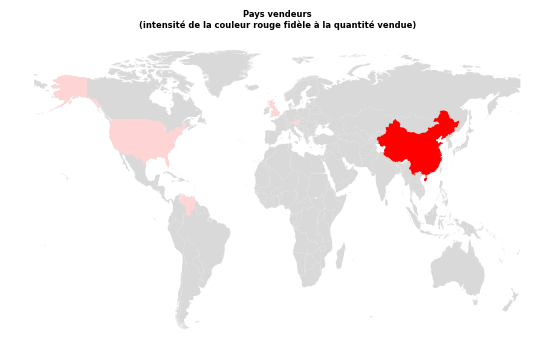

In [230]:
# Chargez le jeu de données à partir d'un fichier Shapefile
gdf = gpd.read_file('world-administrative-boundaries.shp')

# Créez le graphique contenant la carte
fig, ax = plt.subplots(figsize=(12, 4))

# Ajoutez la géométrie de chaque pays à la carte
for code_of_country in gdf['iso_3166_1_']:
    country = gdf[gdf['iso_3166_1_'] == code_of_country]
    country.plot(ax = ax, color = (0.85, 0.85, 0.85), zorder = 10, aspect=1)

# Sélectionnez les pays concernés et les colorer à colorer
for code_pays in ventes_par_codes_pays_producteur.index:
    pays = gdf[gdf['iso_3166_1_'] == code_pays]

    pays.plot(ax = ax,
     color = (1,
     np.sqrt(0.7 - ventes_par_codes_pays_producteur.loc[code_pays, "units_sold"] / np.max(ventes_par_codes_pays_producteur.values)),
     np.sqrt(0.7 - ventes_par_codes_pays_producteur.loc[code_pays, "units_sold"] / np.max(ventes_par_codes_pays_producteur.values))),
     zorder = 20)
    #round(ventes_par_codes_pays_producteur[code_pays] / np.max(ventes_par_codes_pays_producteur.values), 2)

# Afficher le titre
plt.title("Pays vendeurs\n(intensité de la couleur rouge fidèle à la quantité vendue)", fontsize=6, fontweight='bold')

# Rendre invisible le cadre du graphique
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Faire disparaître les graduations et les valeurs sur les axes des abscisses et des ordonnées
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels('')
ax.set_yticklabels('')

# Sauvegarder le graphique en haute définition
plt.savefig('Graphiques/Pays vendeur - Carte.png', dpi=300, bbox_inches='tight')

# Afficher la carte
plt.show()

### i) Prix moyen d'un article par pays vendeur

In [231]:
data_summer_products['chiffre_d_affaire'] = data_summer_products['price'] * data_summer_products['units_sold']
chiffre_d_affaire_par_code_pays_producteur = data_summer_products.groupby("origin_country")["chiffre_d_affaire"].sum()
chiffre_d_affaire_par_code_pays_producteur

origin_country
AT         700.00
CN    54115270.65
GB        9000.00
SG       56993.00
US      432422.00
VE        3424.50
Name: chiffre_d_affaire, dtype: float64

In [232]:
nombre_de_ventes_par_code_pays_producteur = data_summer_products.groupby("origin_country")["units_sold"].sum()
nombre_de_ventes_par_code_pays_producteur

origin_country
AT        100
CN    6651245
GB       1000
SG      20100
US      43560
VE        350
Name: units_sold, dtype: int64

In [233]:
prix_moyen_par_article_par_code_pays_producteur = chiffre_d_affaire_par_code_pays_producteur / nombre_de_ventes_par_code_pays_producteur
prix_moyen_par_article_par_code_pays_producteur

origin_country
AT    7.000000
CN    8.136111
GB    9.000000
SG    2.835473
US    9.927043
VE    9.784286
dtype: float64

In [11]:
# Fonction pour ajouter des annotations sur les barres d'un histograme vertical (valeurs au-dessus des barres)
def annotate_bars(bars, color):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 2)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # Décalage vertical en points
                     textcoords="offset points",
                     ha='center', va='bottom',
                     color=color)

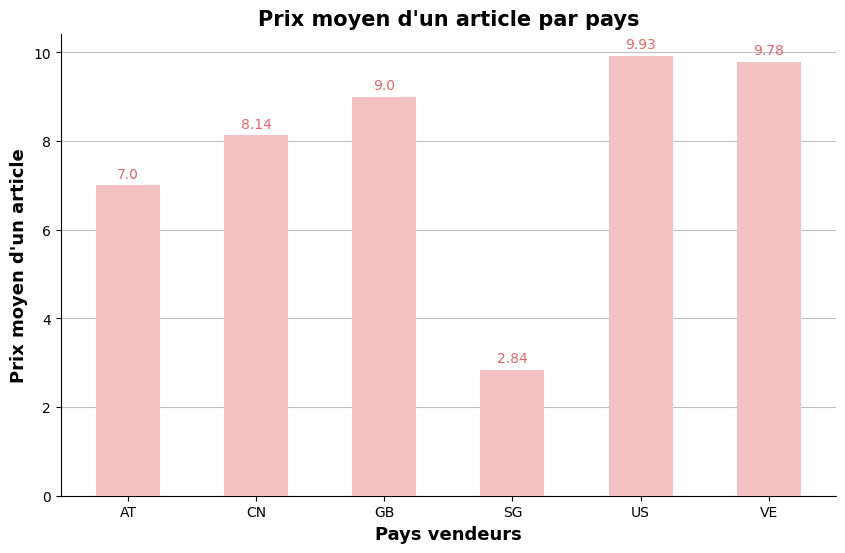

In [235]:
# Taille du graphique souhaité
plt.figure(figsize = [10, 6])

# Ajout d'un titre et des étiquettes 
plt.title("Prix moyen d'un article par pays", fontsize=15, fontweight='bold')
plt.xlabel("Pays vendeurs", fontsize=13, fontweight='bold')
plt.ylabel("Prix moyen d'un article", fontsize=13, fontweight='bold')

# Ajout d'une grille verticale
plt.grid(axis="y", color="silver", zorder = 10)

# Construction du graphique
bars = plt.bar(pays_producteur_indexé_par_code.index,
            prix_moyen_par_article_par_code_pays_producteur.values,
            width=0.5,
            color='#F4C2C2',
            zorder = 20)

# Rendre invisible une partie du cadre du graphique
axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Ajout des valeurs sur les barres
annotate_bars(bars, '#E7666A')

# Sauvegarder le graphique en haute définition
plt.savefig("Graphiques/Prix moyen d'un article par pays.png", dpi=300, bbox_inches='tight')

### j) Note moyenne d'un article par pays vendeur

In [236]:
data_summer_products['points_de satisfaction'] = data_summer_products['rating'] * data_summer_products['units_sold']
points_de_satisfaction_par_code_pays_producteur = data_summer_products.groupby("origin_country")["points_de satisfaction"].sum()
points_de_satisfaction_par_code_pays_producteur

origin_country
AT         500.0
CN    25748671.0
GB        4030.0
SG       72840.0
US      170104.5
VE        1044.0
Name: points_de satisfaction, dtype: float64

In [237]:
note_moyenne_par_article_par_code_pays_producteur = points_de_satisfaction_par_code_pays_producteur / nombre_de_ventes_par_code_pays_producteur
note_moyenne_par_article_par_code_pays_producteur

origin_country
AT    5.000000
CN    3.871256
GB    4.030000
SG    3.623881
US    3.905062
VE    2.982857
dtype: float64

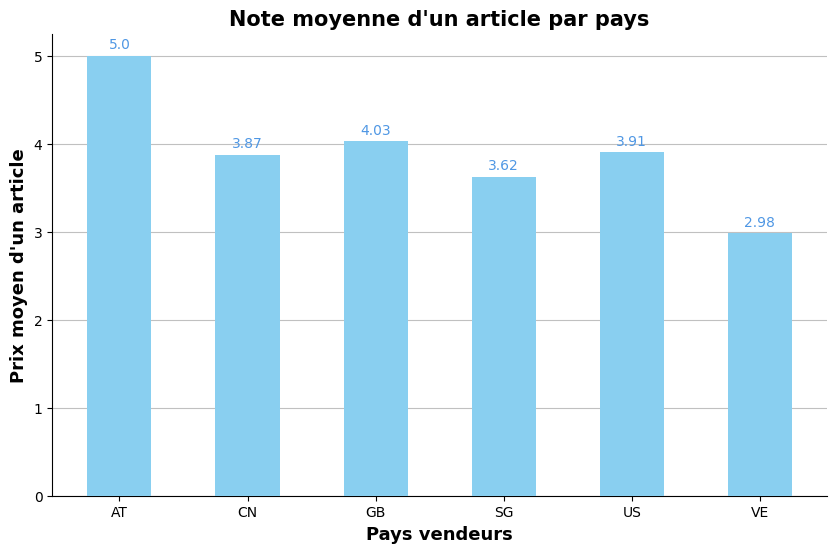

In [238]:
# Taille du graphique souhaité
plt.figure(figsize = [10, 6])

# Ajout d'un titre et des étiquettes 
plt.title("Note moyenne d'un article par pays", fontsize=15, fontweight='bold')
plt.xlabel("Pays vendeurs", fontsize=13, fontweight='bold')
plt.ylabel("Prix moyen d'un article", fontsize=13, fontweight='bold')

# Ajout d'une grille verticale
plt.grid(axis="y", color="silver", zorder=10)

# Construction du graphique
bars = plt.bar(pays_producteur_indexé_par_code.index,
            note_moyenne_par_article_par_code_pays_producteur.values,
            width=0.5,
            color='#89CFF0',
            zorder=20)

# Rendre invisible une partie du cadre du graphique
axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Ajout des valeurs sur les barres
annotate_bars(bars, '#4F97E4')

# Sauvegarder le graphique en haute définition
plt.savefig("Graphiques/Note moyenne d'un article par pays.png", dpi=300, bbox_inches='tight')

### k) Rapport moyen Note/Prix d'un article par pays vendeur

In [239]:
rapport_moyen_par_article_par_code_pays_producteur = note_moyenne_par_article_par_code_pays_producteur / prix_moyen_par_article_par_code_pays_producteur
rapport_moyen_par_article_par_code_pays_producteur

origin_country
AT    0.714286
CN    0.475812
GB    0.447778
SG    1.278052
US    0.393376
VE    0.304862
dtype: float64

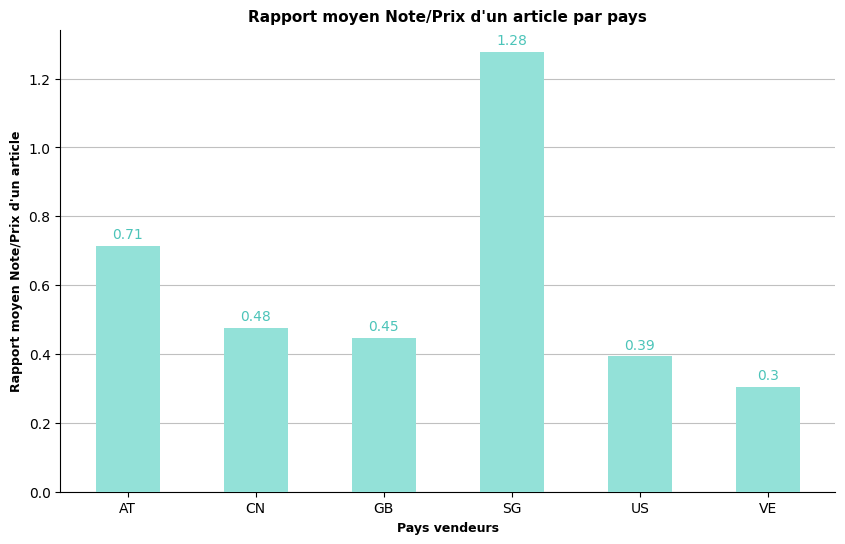

In [240]:
# Taille du graphique souhaité
plt.figure(figsize = [10, 6])

# Ajout d'un titre et des étiquettes 
plt.title("Rapport moyen Note/Prix d'un article par pays", fontsize=11, fontweight='bold')
plt.xlabel("Pays vendeurs", fontsize=9, fontweight='bold')
plt.ylabel("Rapport moyen Note/Prix d'un article", fontsize=9, fontweight='bold')

# Ajout d'une grille verticale
plt.grid(axis="y", color="silver", zorder=10)

# Construction du graphique
bars = plt.bar(pays_producteur_indexé_par_code.index,
            rapport_moyen_par_article_par_code_pays_producteur.values,
            width=0.5,
            color='#93E1D8',
            zorder=20)

# Rendre invisible une partie du cadre du graphique
axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Ajout des valeurs sur les barres
annotate_bars(bars, '#4CC4B9')

# Sauvegarder le graphique en haute définition
plt.savefig("Graphiques/Rapport moyen Note-Prix d'un article par pays.png", dpi=300, bbox_inches='tight')

In [241]:
Arrêt_2 du notebook (de sécurité) # (À masquer ou non selon les besoins)

SyntaxError: invalid syntax (1336314497.py, line 1)

</br></br></br></br></br>

<div align="left"> <h1> B) 2ème PARTIE - Analyses de la composition de vêtements</h1> </div>
<div align="left"> <h3> Scraping des pages produit vers les ventes flash de Shein.com et la collection Femme de Wedressfair.fr</h3> </div>
</br>

|**Méthode de récolte des données**|<i>Web Scraping</i>|
|:-|:-:|
|**Source 1**|https://fr.shein.com|
|**Source 2**|https://www.wedressfair.fr|
|**Bibliothèques utilisées**|<i>BeautifulSoup & Selenium</i>|

### Imports

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import random
import time

## I) Scraping des liens vers les pages produits des ventes flash de Shein.com
(vendredi 28 avril 2023)

### a) Démarche et présentation du site
Shein est un détaillant international de mode en ligne basé en Chine qui propose une gamme variée de vêtements, chaussures et accessoires à prix réduits. Depuis sa création en 2008, le site est devenu célèbre pour sa vaste sélection de produits tendances et abordables, souvent associés à l'industrie de la "fast fashion".

L'objectif est ici de faire la lumière sur les pratiques de production dans l'industrie de la mode et d'évaluer la durabilité des matériaux utilisés. La démarche de scraper les informations de la rubrique "ventes flash" sur Shein.com est motivée par le désir de collecter des données précises sur les matériaux utilisés dans la production de vêtements produit en masse et dont la vente se veut rapide et mise en premier plan sur le site. En analysant ces données, je cherche à comprendre la proportion de vêtements fabriqués à partir de matériaux durables par rapport à ceux qui ne le sont pas.

### b) Scraping des liens vers les produits de chacune des pages de la rubrique "Flash sales" (ventes flash)

In [243]:
# Fonction qui récupère les liens vers les produits d'une des pages de https://fr.shein.com/flash-sale.html

def get_product_links(url):
    chrome_options = Options()
    chrome_options.add_argument('--headless')

    # Choisir le navigateur web automatisé, ici Chrome
    driver = webdriver.Chrome(options=chrome_options)
    
    driver.get(url)

    # Attendre quelques secondes pour que le contenu JavaScript soit chargé
    # Temps additionnel aléatoire
    temps_additionnel_aleatoire = random.uniform(0,3)
    time.sleep(5 + temps_additionnel_aleatoire)
    
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    product_links = []
    
    # Trouver les éléments qui contiennent les liens des produits
    product_elements = soup.find_all('a', class_='S-product-item__img-container j-expose__product-item-img')
    
    for element in product_elements:
        link = element['href']
        if link.startswith('//'):
            link = 'https:' + link
        product_links.append(link)
    
    driver.quit()
    
    return product_links

In [ ]:
# Exemple : lien de la page 4 à scrapper
# https://fr.shein.com/flash-sale.html?_ver=1.1.8&_lang=fr&page=4

In [244]:
# Exemple de scraping : scraping de la quatrième page

url_prefixe = 'https://fr.shein.com/flash-sale.html'
url_radical = '?_ver=1.1.8&_lang=fr&page='

num_page = 4
url_suffixe = str(num_page)

url = url_prefixe + url_radical + url_suffixe
product_links = get_product_links(url)

for link in product_links:
    print(link)

/SHEIN-Unity-Plus-Contrast-Lace-Tie-Back-Raglan-Sleeve-Top-p-14442959-cat-2232.html?mallCode=1
/Plus-Solid-V-Neck-Ruffle-Hem-Blouse-p-12667313-cat-1891.html?mallCode=1
/SHEIN-VCAY-Floral-Print-Contrast-Lace-Cami-Dress-p-14410631-cat-1727.html?mallCode=1
/SHEIN-MOD-Puff-Sleeve-Button-Front-Crop-Blouse-p-12986567-cat-1733.html?mallCode=1
/SHEIN-BASICS-Plus-Striped-Print-Tank-Top-p-14601501-cat-2180.html?mallCode=1
/Solid-Frill-Neck-Belted-A-line-Dress-p-14323139-cat-1727.html?mallCode=1
/Cut-out-PU-Dress-With-Thong-1pair-Toy-Handcuff-p-12178198-cat-1862.html?mallCode=1
/SHEIN-Frenchy-Jacquard-Ruffle-Trim-Dress-p-13594714-cat-1727.html?mallCode=1
/SHEIN-Frenchy-Allover-Floral-Print-Contrast-Guipure-Lace-Shirred-Waist-Dress-p-10580562-cat-1727.html?mallCode=1
/Plus-Contrast-Lace-Underwire-Bra-p-13922550-cat-2354.html?mallCode=1
/Plus-Contrast-Binding-Cut-Out-Halter-Neck-Backless-Crop-Top-p-14410849-cat-2354.html?mallCode=1
/SHEIN-Cut-out-Underwire-Garter-Lingerie-Set-With-1pair-Stocking-p-

In [ ]:
Attention : ne pas exécuter si pas le temps (lire ce qui suit) # sinon "commenter" cette ligne avec un #

url_prefixe = 'https://fr.shein.com/flash-sale.html'
url_radical = '?_ver=1.1.8&_lang=fr&page='

# Scrapping de toutes les pages de référencement

links = []

for num_page in range(1, 30):
    url_suffixe = str(num_page)
    url = url_prefixe + url_radical + url_suffixe
    product_links = get_product_links(url)

    for link in product_links:
        links.append(link)

In [ ]:
# ATTENTION
# Si pas le temps de faire tourner entièrement la longue étape précédente (plusieurs heures d'exécution),
# ne pas exécuter la cellule suivante.
# La cellule d'après (après le c)) permet de récupérer les données enregistrées lors du scraping.

In [ ]:
Arrêt_3 du notebook (de sécurité) # Lire la cellule précédente - À masquer ou non selon les besoins

# Sauvegarde des liens dans un fichier au format CSV
# (pour conserver les avancées de cette étape en cas de blocage)
df_liens_flash_sale = pd.DataFrame(columns=['liens_flash_sale'])
for i in range(len(links)):
    df_liens_flash_sale.loc[i] = [links[i]]

df_liens_flash_sale.to_csv('liens_flash_sale.csv', index = False)

### c) Scraping des compositions des vêtements dans les pages produits

In [245]:
# Récupération des liens vers les pages produit dans le fichier CSV enregistré
df_liens_flash_sale = pd.read_csv('liens_flash_sale.csv')
links = df_liens_flash_sale['liens_flash_sale'].tolist()
links[0:10]

['/Men-Letter-Expression-Print-Flap-Pocket-Drawstring-Waist-Cargo-Pants-p-10485230-cat-1978.html?mallCode=1',
 '/SHEIN-Unity-Plus-Split-Hem-Solid-Leggings-p-9950810-cat-2233.html?mallCode=1',
 '/SHEIN-Boys-Tropical-Print-Top-Shorts-Set-p-10355664-cat-2000.html?mallCode=1',
 '/10pairs-Expression-Print-Invisible-Socks-p-10964916-cat-4300.html?mallCode=1',
 '/SHEGLAM-12-Hr-Full-Coverage-Concealer-Whipped-Cream-Matte-Liquid-Concealer-Long-Lasting-Brightening-Color-Corrector-Weightless-All-Day-Long-Lasting-Hydrating-Concealer-p-1536246-cat-2256.html?mallCode=1',
 '/5pairs-Avocado-Pattern-Invisible-Socks-p-10588935-cat-4300.html?mallCode=1',
 '/10pairs-Solid-Ribbed-Ankle-Socks-p-9793763-cat-4301.html?mallCode=1',
 '/Litchi-Embossed-Zip-Around-Card-Holder-p-10233679-cat-4263.html?mallCode=1',
 '/SHEIN-VCAY-High-Waist-Slant-Pocket-Shorts-p-10639365-cat-1912.html?mallCode=1',
 '/SHEIN-VCAY-Plus-Floral-Print-Guipure-Lace-Trim-Cami-Top-p-4438266-cat-2180.html?mallCode=1']

In [246]:
# Fonction qui récupère la composition d'un vêtement (produit)

def get_composition(url):
    chrome_options = Options()
    chrome_options.add_argument('--headless')

    # Choisir le navigateur web automatisé, ici Chrome
    driver = webdriver.Chrome(options=chrome_options)
    
    driver.get(url)

    # Attendre quelques secondes pour que le contenu JavaScript soit chargé
    # Temps additionnel aléatoire
    temps_additionnel_aleatoire = random.uniform(0,3)
    time.sleep(2.5 + temps_additionnel_aleatoire)
    
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Trouver les éléments de description du produit
    elements_descript_product = soup.find_all('div', class_='product-intro__description-table-item')

    composition_product = False
    # Trouver la composition du produit
    for element_descript_product in elements_descript_product:
        element_descript_product_text = element_descript_product.text
        if "Composition" in element_descript_product_text:
            composition_product_tag = element_descript_product.find('div', class_='val')
            composition_product = composition_product_tag.text
            print(composition_product)
            break



    driver.quit()
    if composition_product:
        return composition_product
    else:
        return "Produit non textile"

In [ ]:
Attention : ne pas exécuter si pas le temps (lire ce qui suit) # sinon "commenter" cette ligne avec un #

# Scrapping de toutes les pages produits

url_prefixe = 'https://fr.shein.com'

composition_products = []

i = 1
for url_suffixe in links:
  url = url_prefixe + url_suffixe
  print(url)
  print(f'{i}/{len(links)}')
  composition_product = get_composition(url)
  composition_products.append(composition_product)
  i += 1

In [ ]:
# ATTENTION
# Si pas le temps de faire tourner entièrement la longue étape précédente (plusieurs heures d'exécution),
# ne pas exécuter la cellule suivante.
# La cellule d'après (après le d)) permet de récupérer les données enregistrées lors du scraping.

In [ ]:
Arrêt_4 du notebook (de sécurité) # Lire la cellule précédente - À masquer ou non selon les besoins

# Sauvegarde des compositions dans un fichier au format CSV
# (pour conserver les avancées de cette étape en cas de blocage)
df_composition_products = pd.DataFrame(columns=['composition_product'])
for i in range(len(links)):
    df_composition_products.loc[i] = [composition_products[i]]

df_composition_products.to_csv('composition_products.csv', index = False)

### d) Nettoyage et gestion des données

In [247]:
# Récupération sous la forme d'un DataFrame des liens vers les pages produit dans le fichier CSV enregistré
df_composition_products = pd.read_csv('composition_products.csv')
print(len(df_composition_products)) # Renvoie à cette étape : 1737

1737


In [248]:
# Suppression des lignes concernant des produits non textile
df_composition_products = df_composition_products.query('composition_product != "Produit non textile"')
print(len(df_composition_products)) # Renvoie à cette étape : 1411

1411


In [249]:
df_composition_products.head(10)

,composition_product
0,100% Polyester
1,"95% Polyester, 5% Élasthanne"
2,100% Polyester
3,100% Polyester
5,"95% Polyester, 5% Élasthanne"
6,"95% Polyester, 5% Élasthanne"
7,100% Polyuréthane
8,100% Coton
9,"95% Polyester, 5% Élasthanne"
10,100% Polyester


In [250]:
# Création d'un dataframe vide pour stocker les pourcentages de chaque matière
df_composition = pd.DataFrame()

# Extraction des pourcentages et des matières et ajout au dataframe df_composition
for index, row in df_composition_products.iterrows():
    compositions = row['composition_product'].split(', ')
    for composition in compositions:
        percentage, material = composition.split('% ')
        material = material.strip()  # Suppression des espaces avant et après le nom de la matière
        percentage = float(percentage) / 100
        if material not in df_composition.columns:
            df_composition[material] = 0.0
        df_composition.at[index, material] = percentage

# Remplissage des valeurs manquantes par 0
df_composition.fillna(0, inplace=True)

df_composition.head(15)

,Polyester,Élasthanne,Polyuréthane,Coton,Polyamide,Nylon,Viscose,Lin,Rayonne,Acrylique,Lyocell,Chlorure de polyvinyle,Métal,Fibres métallisées
0,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.95,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.95,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.95,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.95,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### e) Calculs des moyennes sur les compositions des vêtements

In [251]:
# Calcul de la moyenne de chaque matière dans l'ensemble des produits textiles mis à la vente
# (sans pondération du nombre d'articles vendus)
mean_composition = df_composition.mean()
mean_composition.sort_values(ascending=False, inplace=True)
mean_composition

Polyester                 0.705897
Coton                     0.086547
Polyamide                 0.072587
Élasthanne                0.049112
Viscose                   0.047069
Polyuréthane              0.013607
Nylon                     0.008384
Acrylique                 0.005578
Lin                       0.004890
Rayonne                   0.002346
Chlorure de polyvinyle    0.002126
Métal                     0.001417
Fibres métallisées        0.000397
Lyocell                   0.000043
dtype: float64

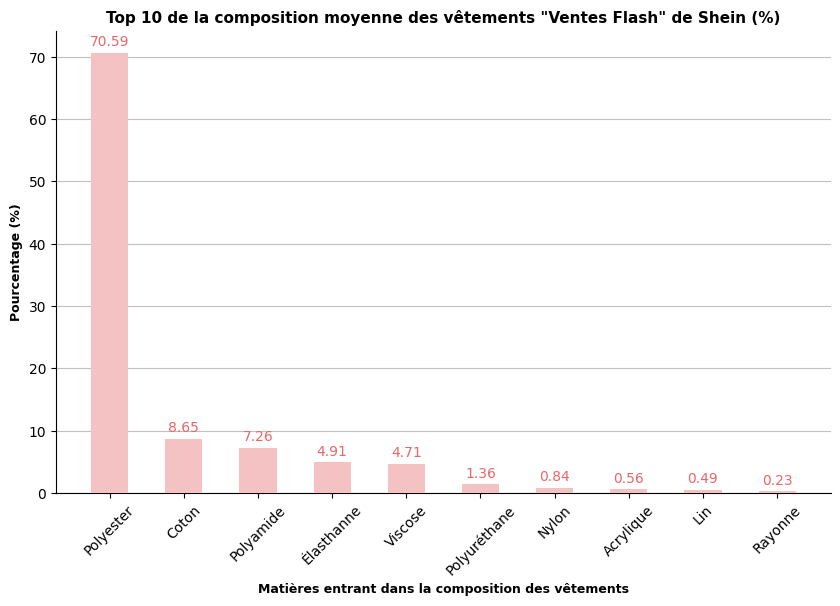

In [252]:
mean_composition_top_10 = mean_composition.head(10)

# Taille du graphique souhaité
plt.figure(figsize = [10, 6])

# Ajout d'un titre et des étiquettes 
plt.title('Top 10 de la composition moyenne des vêtements "Ventes Flash" de Shein (%)', fontsize=11, fontweight='bold')
plt.xlabel("Matières entrant dans la composition des vêtements", fontsize=9, fontweight='bold')
plt.ylabel("Pourcentage (%)", fontsize=9, fontweight='bold')

# Ajout d'une grille verticale
plt.grid(axis="y", color="silver", zorder=10)

# Construction du graphique
bars = plt.bar(mean_composition_top_10.index,
               mean_composition_top_10.values * 100,
               width=0.5,
               color='#F4C2C2',
               zorder=20)

# Rendre invisible une partie du cadre du graphique
axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Ajout des valeurs sur les barres
annotate_bars(bars, '#E7666A')

# Rotation des étiquettes de l'axe des x pour éviter le chevauchement
plt.xticks(rotation=45)

# Sauvegarder le graphique en haute définition
plt.savefig("Graphiques/composition-flash sales-Shein.png", dpi=300, bbox_inches='tight')

In [ ]:
Arrêt_5 du notebook (de sécurité) # (À masquer ou non selon les besoins)

## II) Scraping des liens vers les pages produits des vêtements Femme de wedressfair.fr
(mercredi 03 mai 2023)

### a) Démarche et présentation du site
Wedressfair est une boutique en ligne française spécialisée dans la mode éthique et durable. Elle propose une sélection de vêtements et accessoires de différentes marques engagées dans le respect des conditions de travail, la durabilité et la transparence. Wedressfair s'efforce de promouvoir une alternative à la fast fashion en prouvant qu'il est possible de s'habiller de manière stylée tout en respectant les personnes et la planète.

Je m'intéresse ici à l'analyse des produits proposés par Wedressfair et la démarche, comme précédemment, consistera à scraper les informations relatives à la composition des vêtements proposés sur le site. L'objectif est de récolter des données sur les matières premières utilisées, ainsi que sur leurs certifications éthiques et écologiques.

### b) Scraping des liens vers les produits de chacune des pages de la rubrique "Flash sales" (ventes flash)

In [253]:
# Fonction qui récupère les liens vers les vêtements d'une des pages de https://www.wedressfair.fr/femme

def get_product_links(url):
    chrome_options = Options()
    chrome_options.add_argument('--headless')

    # Choisir le navigateur web automatisé, ici Chrome
    driver = webdriver.Chrome(options=chrome_options)
    
    driver.get(url)

    # Attendre quelques secondes pour que le contenu JavaScript soit chargé
    # Temps additionnel aléatoire
    temps_additionnel_aleatoire = random.uniform(0,3)
    time.sleep(5 + temps_additionnel_aleatoire)
    
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    product_links = []
    
    # Trouver les éléments qui contiennent les liens des produits
    product_elements = soup.find_all('a', class_='flex flex-col justify-between h-full')
    
    for element in product_elements:
        link = element['href']
        if link.startswith('//'):
            link = 'https:' + link
        product_links.append(link)
    
    driver.quit()
    
    return product_links

In [ ]:
# Exemple : lien de la page 4 à scrapper
# https://www.wedressfair.fr/femme?page=4

In [254]:
# Exemple de scraping : scraping de la quatrième page

url_prefixe = 'https://www.wedressfair.fr/femme?page='

num_page = 4
url_suffixe = str(num_page)

url = url_prefixe + url_suffixe
product_links = get_product_links(url)

for link in product_links:
    print(link)

/collections/robe-portefeuille-bleu-clair-en-lin-bio-linen-wrap-dress-airy-blue-knowledge-cotton-apparel
/collections/robe-bleue-rayee-en-coton-bio-t-shirt-dress-sunset-stripe-patagonia
/collections/robe-t-shirt-noire-en-coton-bio-t-shirt-dress-black-rotholz
/collections/tailliertes-t-shirt-jara-marineblau-aus-100-bio-baumwolle-nordlicht
/collections/t-shirt-manches-longues-cotele-lilas-en-coton-bio-soft-lavender-colorful-standard
/collections/t-shirt-gris-en-tencel-et-coton-bio-jilaana-mid-grey-melange-armedangels
/collections/t-shirt-marine-en-tencel-et-coton-bio-jilaana-night-sky-armedangels
/collections/t-shirt-cotele-beige-en-coton-bio-kardaa-light-desert-armedangels
/collections/t-shirt-ample-imprime-blanc-en-coton-bio-layaa-floraa-white-armedangels
/collections/t-shirt-manches-3-4-noir-et-ecru-en-coton-bio-sianaa-lovely-stripes-black-oatmilk-armedangels
/collections/t-shirt-cotele-noir-en-coton-bio-black-dakota-rib-top-thinking-mu
/collections/t-shirt-cotele-bleu-klein-en-coton-

In [ ]:
Attention : ne pas exécuter si pas le temps (lire ce qui suit) # sinon "commenter" cette ligne avec un #

url_prefixe = 'https://www.wedressfair.fr/femme?page='

# Scrapping de toutes les pages de référencement

links = []

for num_page in range(1, 14):
    url_suffixe = str(num_page)
    url = url_prefixe + url_suffixe
    product_links = get_product_links(url)

    for link in product_links:
        links.append(link)

In [ ]:
# ATTENTION
# Si pas le temps de faire tourner entièrement la longue étape précédente (plusieurs heures d'exécution),
# ne pas exécuter la cellule suivante.
# La cellule d'après (après le c)) permet de récupérer les données enregistrées lors du scraping.

In [ ]:
Arrêt_6 du notebook (de sécurité) # Lire la cellule précédente - À masquer ou non selon les besoins

# Sauvegarde des liens dans un fichier au format CSV
# (pour conserver les avancées de cette étape en cas de blocage)
df_liens_wedressfair_femme = pd.DataFrame(columns=['liens_wedressfair_femme'])
for i in range(len(links)):
    df_liens_wedressfair_femme.loc[i] = [links[i]]

df_liens_wedressfair_femme.to_csv('liens_wedressfair_femme.csv', index = False)

### c) Scraping des compositions des vêtements dans les pages produits

In [2]:
# Récupération des liens vers les pages produit dans le fichier CSV enregistré
df_liens_flash_sale = pd.read_csv('liens_wedressfair_femme.csv')
links = df_liens_flash_sale['liens_wedressfair_femme'].tolist()
links[0:10]

['/collections/robe-longue-texturee-verte-en-coton-bio-bubble-strap-dress-morera-green-brava-fabrics',
 '/collections/t-shirt-col-v-blanc-en-coton-bio-emikaa-white-armedangels',
 '/collections/pantalon-ample-noir-en-coton-bio-black-karina-pants-thinking-mu',
 '/collections/t-shirt-vert-en-coton-bio-idaara-smith-green-armedangels',
 '/collections/t-shirt-blanc-en-coton-bio-big-collar-t-shirt-white-rotholz',
 '/collections/t-shirt-blanc-en-coton-bio-et-recycle-tarjaa-white-armedangels',
 '/collections/t-shirt-blanc-en-dentelle-de-coton-bio-lace-oversize-tee-white-brava-fabrics',
 '/collections/t-shirt-blanc-en-coton-bio-shirt-ovar-white-jan-n-june',
 '/collections/debardeur-cotele-bleu-petrole-en-coton-bio-petrol-blue-colorful-standard',
 '/collections/debardeur-cotele-vieux-rose-en-coton-bio-rosewood-mist-colorful-standard']

In [256]:
# Fonction qui récupère la composition d'un vêtement (produit)

def get_composition(url):
    chrome_options = Options()
    chrome_options.add_argument('--headless')

    # Choisir le navigateur web automatisé, ici Chrome
    driver = webdriver.Chrome(options=chrome_options)
    
    driver.get(url)

    # Attendre quelques secondes pour que le contenu JavaScript soit chargé
    # Temps additionnel aléatoire
    temps_additionnel_aleatoire = random.uniform(0,3)
    time.sleep(2.5 + temps_additionnel_aleatoire)
    
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Trouver le tag de la composition
    composition_product_tag = soup.find('div', class_='bg-white p-2 mb-2 -mt-px border-b border-gray-300')

    # Trouver la composition du produit
    composition_product = composition_product_tag.text
    print(composition_product)

    driver.quit()
    if composition_product:
        return composition_product
    else:
        return "Composition du vêtement non renseignée"

In [ ]:
ne pas exécuter si pas le temps (lire ce qui suit) # sinon "commenter" cette ligne avec un #

# Scrapping de toutes les pages vêtement femme

url_prefixe = 'https://www.wedressfair.fr'

composition_products = []

i = 1
for url_suffixe in links:
  url = url_prefixe + url_suffixe
  print(url)
  print(f'{i}/{len(links)}')
  composition_product = get_composition(url)
  composition_products.append(composition_product)
  i += 1

In [ ]:
# ATTENTION
# Si pas le temps de faire tourner entièrement la longue étape précédente (plusieurs heures d'exécution),
# ne pas exécuter la cellule suivante.
# La cellule d'après (après le d)) permet de récupérer les données enregistrées lors du scraping.

In [ ]:
Arrêt_7 du notebook (de sécurité) # Lire la cellule précédente - À masquer ou non selon les besoins

# Sauvegarde des compositions dans un fichier au format CSV
# (pour conserver les avancées de cette étape en cas de blocage)
df_composition_products = pd.DataFrame(columns=['composition_product'])
for i in range(len(links)):
    df_composition_products.loc[i] = [composition_products[i]]

df_composition_products.to_csv('composition_products_ethic.csv', index = False)

### d) Nettoyage et gestion des données

In [3]:
# Récupération sous la forme d'un DataFrame des liens vers les pages produit dans le fichier CSV enregistré
df_composition_products = pd.read_csv('composition_products_ethic.csv')
print(len(df_composition_products)) # Renvoie à cette étape : 975

975


In [4]:
# Suppression des lignes concernant des produits non textile
df_composition_products = df_composition_products.query('composition_product != "Composition du vêtement non renseignée"')
print(len(df_composition_products)) # Renvoie à cette étape : 975 , ce qui signifie que chaque page scrappée contient le mot composition

# Suppression des retours lignes en début et fin du texte de la composition
for i in range(len(df_composition_products)):
    df_composition_products.iloc[i, 0] = df_composition_products.iloc[i, 0][1:-1]

975


In [5]:
df_composition_products.head(10)

,composition_product
0,100% coton biologique
1,100% coton biologique
2,100% coton biologique
3,100% coton biologique
4,100% coton biologique
5,"50% coton recyclé, 50% coton biologique"
6,100% coton biologique
7,"96% coton biologique, 4% élasthanne"
8,"95% coton biologique, 5% élasthanne"
9,"95% coton biologique, 5% élasthanne"


In [6]:
# Création d'un dataframe vide pour stocker les pourcentages de chaque matière
df_composition = pd.DataFrame()

# Extraction des pourcentages et des matières et ajout au dataframe df_composition
for index, row in df_composition_products.iterrows():
    compositions = row['composition_product'].split(', ')
    for composition in compositions:
        # Test pour éviter les compositions erronées 
        if '%' in composition:
            percentage, material = composition.split('% ')
            material = material.strip()  # Suppression des espaces avant et après le nom de la matière
            percentage = float(percentage) / 100
        # On supprime la ligne
        else :
            df_composition.drop
        if material not in df_composition.columns:
            df_composition[material] = 0.0
        df_composition.at[index, material] = percentage

# Remplissage des valeurs manquantes par 0
df_composition.fillna(0, inplace=True)

df_composition.head(15)

,coton biologique,coton recyclé,élasthanne,tencel® (lyocell),lin,ecovero® (par lenzing®),viscose (procédé lyocell),polyester recyclé,coton biologique recyclé,lin biologique,...,polyamide,viscose recyclée,laine certifiée,acétate biodégradable,cuir certifié lwg,nylon recyclé,argent 925,coton upcyclé,cachemire recyclé,laine mérinos recyclée
0,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.50,0.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.96,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.95,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.95,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Calcul de la moyenne de chaque matière dans l'ensemble des produits textiles mis à la vente
# (sans pondération du nombre d'articles vendus)
mean_composition = df_composition.mean()
mean_composition.sort_values(ascending=False, inplace=True)
mean_composition

coton biologique                        0.631446
ecovero® (par lenzing®)                 0.076410
tencel® (lyocell)                       0.069149
coton recyclé                          0.031764
pet recyclé                            0.029744
polyester recyclé                       0.029210
lin                                     0.021323
lin biologique                          0.020451
élasthanne                              0.008421
polyamide recyclé                       0.007118
matière upcyclée                        0.006154
viscose (procédé lyocell)               0.006021
micromodal                              0.005559
acétate biodégradable                   0.005128
modal                                   0.003969
or certifié                             0.003077
laine certifiée                         0.002503
polyamide recyclé (pré-consommation)    0.002215
nylon recyclé                           0.002051
cuir certifié lwg                       0.002051
coton en conversion 

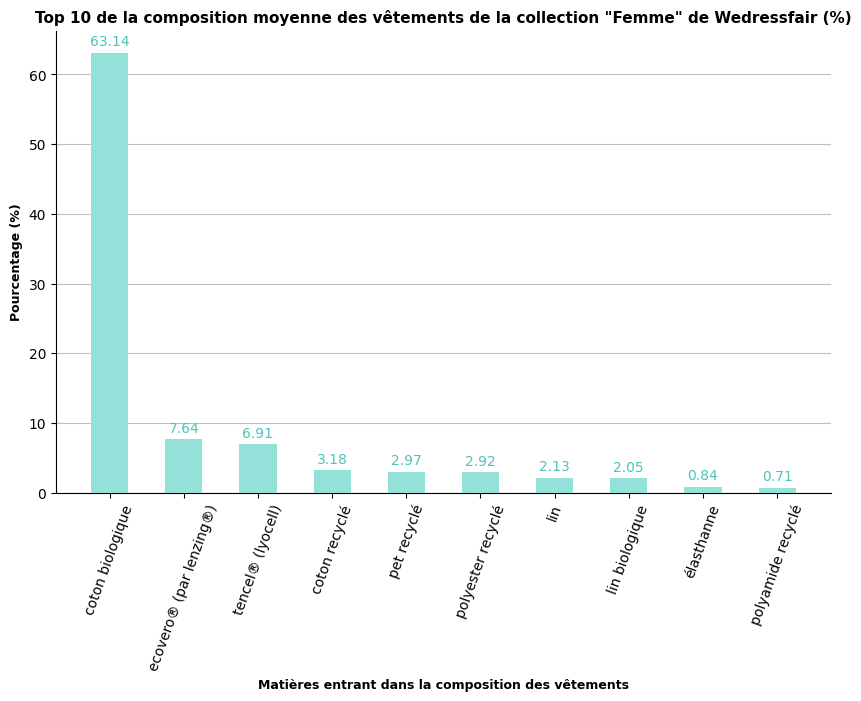

In [12]:
mean_composition_top_10 = mean_composition.head(10)

# Taille du graphique souhaité
plt.figure(figsize = [10, 6])

# Ajout d'un titre et des étiquettes 
plt.title('Top 10 de la composition moyenne des vêtements de la collection "Femme" de Wedressfair (%)', fontsize=11, fontweight='bold')
plt.xlabel("Matières entrant dans la composition des vêtements", fontsize=9, fontweight='bold')
plt.ylabel("Pourcentage (%)", fontsize=9, fontweight='bold')

# Ajout d'une grille verticale
plt.grid(axis="y", color="silver", zorder=10)

# Construction du graphique
bars = plt.bar(mean_composition_top_10.index,
               mean_composition_top_10.values * 100,
               width=0.5,
               color='#93E1D8',
               zorder=20)

# Rendre invisible une partie du cadre du graphique
axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Ajout des valeurs sur les barres
annotate_bars(bars, '#4CC4B9')

# Rotation des étiquettes de l'axe des x pour éviter le chevauchement
plt.xticks(rotation=70)

# Sauvegarder le graphique en haute définition
plt.savefig("Graphiques/composition-femme-Wedressfair.png", dpi=300, bbox_inches='tight')

Les matières écologiques les plus plébiscitées sont les suivantes : tencel, lyocell, lin, chanvre, jute, liège, coton biologique. Par exemple, le tencel est une matière issue de la pulpe de bois et sa production nécessite 5 fois moins d'eau que le coton !


Le Tencel® (ou lyocell) est une fibre écologique. Il est fabriqué chimiquement à partir de pulpe de bois et d'un solvant organique non-toxique et recyclé à plus de 99%.


 Les marques éthiques et éco-responsables se distinguent par le choix des matières, par les lieux de fabrication de leurs produits, par leurs engagements solidaires, par leur transparence, etc. Pour reconnaitre un vêtement vraiment éco-responsable on vous invite à lire notre article 3 étapes pour reconnaitre un vêtement éco-responsable.